## 6장. 특징 기술(feature descript)

---

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/descript1.PNG" width="600" height="750">


특징점, 관심점(interest point), 영역(area), edge 모두 특징(feature)이다.

하지만, 매칭에 사용하기에는 정보가 부족하다.

sift : 관심점 (x,y,스케일) , area : 연결요소 , edge: 에지맵, 에지강도 뿐이다.

---

- 기술자 (descriptor)

특징들의 주변 또는 내부를 들여다 보고 풍부한 정보를 추출하는 알고리즘.

여러개의 값으로 표현 되므로 <span style="color:blue">특징 벡터</span>라고도 한다.

<정보1, 정보2, 정보3...>

<br>
<br>

### 1. 특징 기술자의 조건
---



1. 기술자의 분별력



2. 다양한 변환에 불변(invariant)


- 상황에 맞는 기술자

- 불변과 공변

- 광도 불변성


3. 특징 벡터의 차원

차원이 낮을 수록 계산 효율을 높아진다.

<br>
<br>



### 2. 특징점을 위한 기술자
---

특징점은 해리스 코너 처럼 스케일 정보가 없는 특징은. <y,x>

해리스 라플라스나 SIFT는 스케일을 가지고 있어, <y,x,σ>

---

특징점들의 주변 또는 내부를 들여다 보고 풍부한 정보를 추출해야한다.

특징점에서 기술자를 추출하려면 (y,x)를 중심으로 윈도우를 씌우고 내부를 살펴보면된다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/interestpoint.PNG" width="500" height="500">

a와 b에 관심점이 검출되어, 21X21 윈도우를 씌우고 확대한 장면.

- (b) 그림:
카메라 이동만 발생하면, 윈도우 내부 영역이 비슷하여 어떤 기술자든 큰 어려움 없이 매칭에 성공함.

- (c) 그림:
150도 회전과 0.5배 축소 ( 기하변환 )이 발생한 영상. 

(c)그림에서 매칭하려면 <span style="color:blue">크기와 회전에 불변한 기술자</span>를 고안해야 한다.

방법은 영상의 스케일에 따라 윈도우 크기를 줄이고 적절하게 회전된 윈도우를 사용해야한다.

만약, 스케일 정보가 없는 특징은 윈도우 크기를 조절하는데 쓸 수 있는 기술자가 없는 것. 

따라서, 앞으로 스케일 정보가 있는 특징점만 사용된다.

<br>
<br>

### 2-1. SIFT 기술자
---
SIFT의 특징점인 키포인트에서 기술자를 추출하는 방법.

##### 크기 변환 불변
---
σ 정보를 가지고 있으니 

1. 윈도우 크기를 σ에 따라 조절.

2. σ에 따라 영상을 스무딩.

하지만, 키포인트가 수백에서 수천이면 매번 영상을 스무딩 해야하나?

이미 키포인트에는 옥타브 o, 스케일σ 와 영상에서 위치 (r,c)를 가지고 있다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/sift1.PNG" width="150" height="150">

앞으로는, 이 영상에서 기술자를 추출한다.

##### 회전 변환 불변
---
(c) 그림처럼 회전이 발생한다면, 윈도우도 방향이 조절되야 한다.

기술자를 추출하기전에, 지배적인 방향(dominant orientation)을 찾아낸다.

각 키포인트에 방향이 추가되는 것.

```
dominant orientation을 찾는 방법.
1. 키포인트를 중심으로 일정 크기의 윈도우를 씌운 후, (일정 크기?)
2. 윈도우 내의 화소 집합에 대해 그레디언트 방향 히스토그램을 구하여 알아낸다.

```

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/gradient_orientation.PNG" width="250" height="250">

그리고 히스토그램으로 각도를 나타내면

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/orientation.PNG" width="350" height="350">

이때, 가장 큰 각도가 dominant orientation 이며, 최고값의 빈도 x 0.8 인 각도도 dominant orientation이다.

그러므로, key point가 방향이 다른 여러개가 될수도 있다.

결과. 하나의 키포인트는 <y,x,σ,θ> 가 된다.

<br>
<br>

####  SIFT 기술자 추출 알고리즘 (SIFT descriptor extraction) (LOWE2004)
---

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/sift_descriptor1.png" width="250" height="200">

키포인트에 적절한 크기의 윈도우를 씌운다.

이때, dominant orientation(θ)가 기준이 되도록 좌표계를 설정하면, 방향 불변성이 달성된다.

자세히 살펴보면.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/sift_descriptor.PNG" width="550" height="700">

1. 16x16 픽셀로 윈도우  분할
2. 한 블록을 (4x4)로 합친다.
3. 한블록 16칸 화소 각각 그레디언트 방향을 계산 후, 8단계 양자화
4. <1,2,3,4,5,6,7,8> 각 방향들을 8차원 벡터에 담는다.
5. (16 블록) x (8차원 벡터) -> 128차원 특징벡터 생성.


---
추가. 광도 불변성은 특징 벡터 x를 ||x||로 나누어 정규화.

----

추가. 투영변환을 반영하지 못한다.

원본 keypoint 수 :  82
SIFT 검출,DESCRIPTOR 추출시간:  0.007875680923461914
1/2 사이즈 keypoint 수 :  36
1/2 사이즈,회전  keypoint 수 :  34


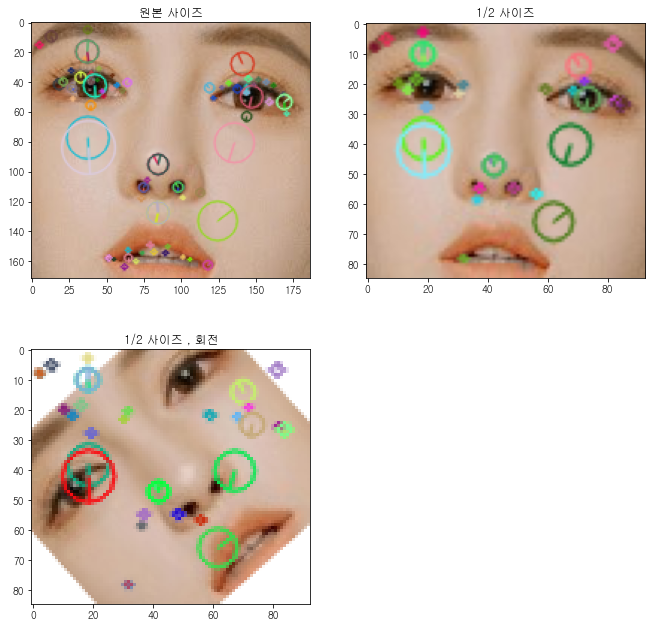

In [72]:
# ex) sift descriptor extraction
# 프린트해서, 벡터 크기나 모습을 봐야하고, 이진기술자들과 비교위해 차원수.
#https://intuitive-robotics.tistory.com/93
#https://bkshin.tistory.com/entry/OpenCV-27-%ED%8A%B9%EC%A7%95-%EB%94%94%EC%8A%A4%ED%81%AC%EB%A6%BD%ED%84%B0-%EA%B2%80%EC%B6%9C%EA%B8%B0-SIFT-SURF-ORB

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


import cv2
import numpy as np
from matplotlib import pyplot as plt
import time



img = cv2.imread("../data/face_model.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img2 = cv2.imread("../data/face_model_small.jpg")
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

img3 = cv2.imread("../data/face_model_small_rotate.png")
gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)


#SIFT 추출기 생성
sift = cv2.xfeatures2d.SIFT_create() #default

#keypoint 검출
start = time.time() 
keypoints,descriptor = sift.detectAndCompute(gray, None)
delta = time.time() - start
print("원본 keypoint 수 : ", len(keypoints))
print("SIFT 검출,DESCRIPTOR 추출시간: ",delta)

keypoints2,descriptor2 = sift.detectAndCompute(gray2, None)
print("1/2 사이즈 keypoint 수 : ", len(keypoints2))

keypoints3,descriptor3 = sift.detectAndCompute(gray3, None)
print("1/2 사이즈,회전  keypoint 수 : ", len(keypoints3))

#키포인트 그리기
img_draw = cv2.drawKeypoints(img, keypoints, None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) #rich를 해야지 dominant orientation이 나온다.
img_draw2 = cv2.drawKeypoints(img2, keypoints2, None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_draw3 = cv2.drawKeypoints(img3, keypoints2, None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)



# cv2.DRAW_MATCHES_FLAGS_DEFAULT : 특정한 위치만을 표현하는 작은 크기의 원

img_rgb= cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB)#PLOT 출력위해
img_rgb2= cv2.cvtColor(img_draw2, cv2.COLOR_BGR2RGB)#PLOT 출력위해
img_rgb3= cv2.cvtColor(img_draw3, cv2.COLOR_BGR2RGB)#PLOT 출력위해



fig =plt.figure(figsize=(11,11))

plt.subplot(221),plt.title("원본 사이즈")# 2행 2열중 1번째
plt.imshow(img_rgb)

plt.subplot(222),plt.title("1/2 사이즈")# 2행 2열중 2번째
plt.imshow(img_rgb2)

plt.subplot(223),plt.title("1/2 사이즈 , 회전")# 2행 2열중 3번째
plt.imshow(img_rgb3)

plt.show()





In [73]:
#https://answers.opencv.org/question/12049/sift-octave-bug/ 옥타브설명

print("keypoint")
print(keypoints[0].pt,"각도: ",keypoints[0].angle,"\n반경: ",keypoints[0].size,"옥타브: ", keypoints[0].octave)
print("\ndescriptor: 특징벡터 차원",descriptor[0].size )
print(descriptor[0]) # 16칸 각각8벡터 0~160인것은 그래디언트 가중치가 더해져서.
print("옥타브: ",keypoints[0].octave&0xFF)# 0xFF 는 255. 굳이 왜 앤드연산을 하게 만들었나? keypoints객체가 sift말고도 사용되서

#그외에도  
# https://stackoverflow.com/questions/48385672/opencv-python-unpack-sift-octave

keypoint
(5.112600803375244, 15.530515670776367) 각도:  61.07196044921875 
반경:  4.365142345428467 옥타브:  14090496

descriptor: 특징벡터 차원 128
[  0.   0.   0.   2. 160.  29.   0.   0.  70.   0.   0.   1. 160.  59.
   2.  16. 160.   1.   0.   0.   2.   2.   1.  49.  80.   7.   4.   6.
   2.   0.   0.   7.   0.   0.   0.   0. 110.  59.   0.   0.  70.   3.
   0.   0. 160. 160.   3.  10. 160.  24.   0.   0.   8.  13.   2.  17.
  75.  13.   2.   3.   6.   0.   0.   1.   0.   0.   0.   0.  21.  11.
   0.   0.  21.   0.   0.   0. 116. 103.   7.  12. 160.  21.   0.   0.
  10.  24.   8.  35.  80.  22.   1.   1.   6.   0.   0.   1.   0.   0.
   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   1.   0.   1.
  39.   3.   0.   0.   0.   1.   1.   8.  28.  12.   0.   0.   1.   0.
   0.   1.]
옥타브:  0
